In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


### Load the datasets

In [6]:
train_df = pd.read_csv('../titanic_prediction/train.csv')
test_df = pd.read_csv('../titanic_prediction/test.csv')

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check the data quality

In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
train_df.shape

(891, 12)

In [13]:
test_df.shape

(418, 11)

### Data Pre-processing

In [15]:
train_df = test_df.fillna(method='ffill')
test_df = test_df.fillna(method='ffill')

In [29]:
train_df.isnull().sum()

PassengerId     0
Survived        0
Name            0
Ticket          0
Cabin           1
Pclass_enc      0
Sex_enc         0
Age_enc         0
SibSp_enc       0
Parch_enc       0
Fare_enc        0
Embarked_enc    0
dtype: int64

In [28]:
test_df.isnull().sum()

PassengerId      0
Name             0
Ticket           0
Cabin           12
Pclass_enc       0
Sex_enc          0
Age_enc          0
SibSp_enc        0
Parch_enc        0
Fare_enc         0
Embarked_enc     0
dtype: int64

In [25]:
# label encoding
label_encoder = preprocessing.LabelEncoder()
test_df['Pclass_enc'] = label_encoder.fit_transform(test_df['Pclass'])
test_df['Sex_enc'] = label_encoder.fit_transform(test_df['Sex'])
test_df['Age_enc'] = label_encoder.fit_transform(test_df['Age'])
test_df['SibSp_enc'] = label_encoder.fit_transform(test_df['SibSp'])
test_df['Parch_enc'] = label_encoder.fit_transform(test_df['Parch'])
test_df['Fare_enc'] = label_encoder.fit_transform(test_df['Fare'])
test_df['Embarked_enc'] = label_encoder.fit_transform(test_df['Embarked'])

In [26]:
train_df['Pclass_enc'] = label_encoder.fit_transform(train_df['Pclass'])
train_df['Sex_enc'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Age_enc'] = label_encoder.fit_transform(train_df['Age'])
train_df['SibSp_enc'] = label_encoder.fit_transform(train_df['SibSp'])
train_df['Parch_enc'] = label_encoder.fit_transform(train_df['Parch'])
train_df['Fare_enc'] = label_encoder.fit_transform(train_df['Fare'])
train_df['Embarked_enc'] = label_encoder.fit_transform(train_df['Embarked'])

In [34]:
# del train_df['Pclass']
# del train_df['Sex']
# del train_df['Age']
# del train_df['SibSp']
# del train_df['Parch']
# del train_df['Fare']
# del train_df['Embarked']
# del train_df['PassengerId']
# del train_df['Name']
# del train_df['Cabin']
# del train_df['Ticket']

# # del test_df['Pclass']
# # del test_df['Sex']
# # del test_df['Age']
# # del test_df['SibSp']
# # del test_df['Parch']
# # del test_df['Fare']
# # del test_df['Embarked']
# del test_df['PassengerId']
# del test_df['Name']
# del test_df['Cabin']
# del test_df['Ticket']


In [36]:
train_df.head()

,Survived,Pclass_enc,Sex_enc,Age_enc,SibSp_enc,Parch_enc,Fare_enc,Embarked_enc
0,0,2,1,28,1,0,18,2
1,1,0,0,51,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,47,1,0,189,2
4,0,2,1,47,0,0,43,2


In [37]:
test_df.head()

,Pclass_enc,Sex_enc,Age_enc,SibSp_enc,Parch_enc,Fare_enc,Embarked_enc
0,2,1,44,0,0,24,1
1,2,0,60,1,0,5,2
2,1,1,74,0,0,41,1
3,2,1,34,0,0,34,2
4,2,0,27,1,1,46,2


In [38]:
# split the data into x and y

X = train_df[['Pclass_enc','Sex_enc','Age_enc','SibSp_enc','Parch_enc','Fare_enc','Embarked_enc']]
y = train_df[['Survived']]

In [40]:
# split the data into train and test

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(train_df)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [49]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [45]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train_scaled,y_train)

In [47]:
decision_tree_score = clf.score(x_test_scaled,y_test)*100
print(f'decision tree model score: {decision_tree_score}')

decision tree model score: 73.99103139013454


In [53]:
rf_clf = RandomForestClassifier(max_depth = 2, random_state = 0)
rf_clf.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [54]:
rf_clf_score = rf_clf.score(x_test_scaled,y_test)*100
print(f'Random Forest model score: {rf_clf_score}')

Random Forest model score: 79.37219730941703


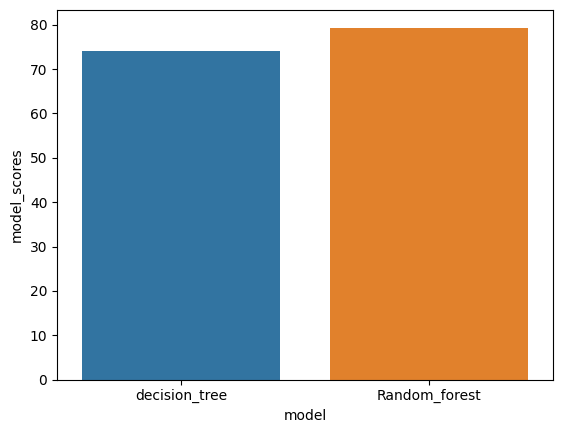

In [64]:
scores_df = pd.DataFrame({
    "model": ["decision_tree","Random_forest"],
    "model_scores": [decision_tree_score,rf_clf_score]
}, columns=["model","model_scores"])
scores_df

bar = sns.barplot(scores_df, x = "model", y = "model_scores")